There is GenSubjValue tag, that can be inferred as the keywords or the topics associated with the articles, in the xml. This notebook gives a brief EDA of these tags as well as well as other data.

In [1]:
# Importing our required libraries
import os
import pandas as pd
from lxml import etree
from bs4 import BeautifulSoup
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk
import spacy
import re

# scikit-learn library will generate our document-term matrix
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

# topic modelling
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import gensim


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim
from pprint import pprint

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import random
random.seed(929)

In [2]:
wsj = pd.read_csv('..//data/wsj_full.csv')

In [3]:
# only relevant articles are selected
tp_li = [0, 2, 4, 6, 7, 8, 9, 10, 14, 17, 19]
wsj_selected = wsj[wsj['Topic_Num'].isin(tp_li)] 

In [4]:
wsj_selected['Topics'] = wsj_selected['Topics'].apply(eval) # convert string to list
wsj_t = wsj_selected.explode('Topics') # label each row with only one topic


/home/ec2-user/SageMaker/.conda/envs/sample_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
# check None or Nan in Topics column
print(wsj_selected['Topics'].isnull().unique())

[False]


In [6]:
# count the frequency of each topic
from collections import Counter

count = dict(Counter(list(wsj_t['Topics']))) # count the occurences of each topics
count_df = pd.DataFrame.from_dict(count, orient = 'index') #convert the dict to dataframe

count_df = count_df.reset_index()
count_df.columns = ['Topics', 'Num_document']

count_df = count_df.sort_values(by = ['Num_document'], ascending = False)

count_df.head()

,Topics,Num_document
5,COVID-19,4990
4,Coronaviruses,4903
3,Pandemics,3833
23,Investments,1753
22,Stock exchanges,1166


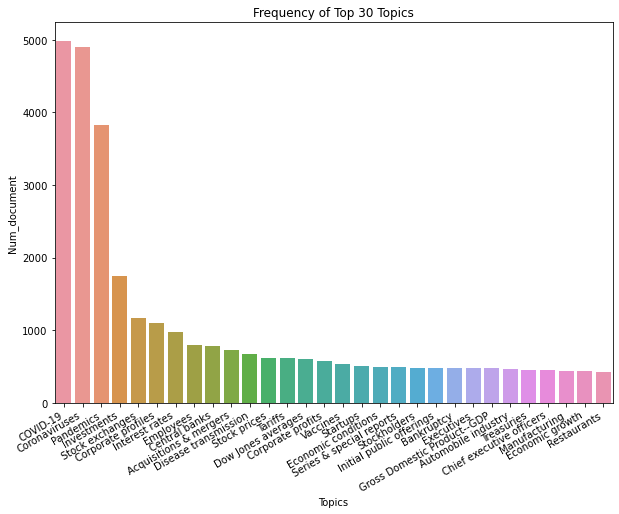

In [7]:
plt.subplots(figsize = (10, 7))

topi = sns.barplot(x = 'Topics', y = 'Num_document', data = count_df.head(30))
topi.set_xticklabels(topi.get_xticklabels(), 
                          rotation=30, 
                          horizontalalignment='right',
                          fontsize = 10)

plt.title("Frequency of Top 30 Topics")
plt.show()

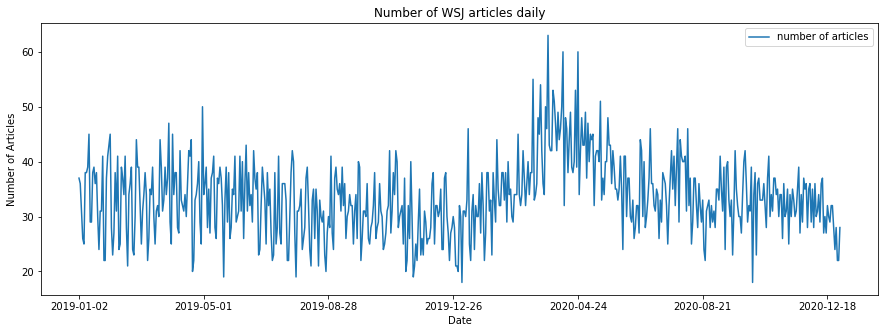

In [8]:
# frequency of articles relevant each day
num_article = pd.DataFrame(wsj_selected.groupby(by = 'Date')['Article ID'].count())
num_article.columns = ['number of articles']

num_article.plot(figsize = (15, 5), title = 'Number of WSJ articles daily', ylabel = 'Number of Articles')
plt.show()

In [9]:
num_article['number of articles'].describe()

count    611.000000
mean      33.553191
std        6.911978
min       18.000000
25%       29.000000
50%       33.000000
75%       38.000000
max       63.000000
Name: number of articles, dtype: float64